In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews#Womens%20Clothing%20E-Commerce%20Reviews.csv

In [2]:
e_comm_data = pd.read_csv('../data/E-commerce.csv', index_col=0)

e_comm_data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
3269,1035,56,5,1,12,General,Bottoms,Jeans
21795,863,42,3,1,1,General Petite,Tops,Knits
5259,1033,37,5,1,4,General,Bottoms,Jeans
10831,1110,45,5,1,17,General,Dresses,Dresses
9794,933,41,5,1,0,General Petite,Tops,Sweaters
3858,932,36,5,1,0,General,Tops,Sweaters
1723,431,19,4,1,0,Initmates,Intimate,Intimates
13333,980,45,5,1,1,General Petite,Jackets,Jackets
18611,872,50,3,0,3,General,Tops,Knits
18083,862,54,5,1,0,General,Tops,Knits


In [3]:
e_comm_data.shape

(23472, 8)

In [4]:
# 'RatingProduct' - rating by reviewer
# 'Recommended IND' - Whether the product is recommended or not by the reviewer

e_comm_data = e_comm_data[['Recommended IND', 'Rating']]

e_comm_data.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


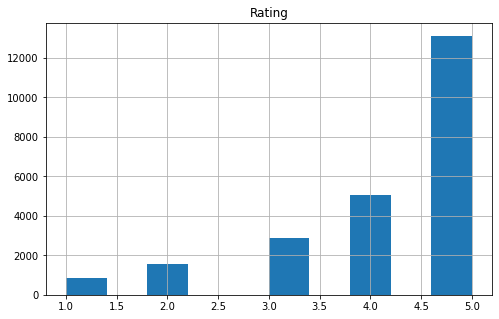

In [5]:
e_comm_data[['Rating']].hist(figsize=(8, 5));

### Make a dataframe which having columns `Rating` and contain sum of `frequency` of rating.

https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

In [6]:
df_for_obs = pd.crosstab(e_comm_data['Recommended IND'], 
                         e_comm_data['Rating'])

df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


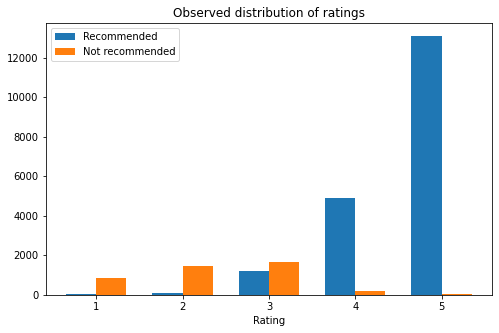

In [7]:
plt.figure(figsize=(8, 5))

width=0.35
plt.bar(df_for_obs.T.index-width/2, df_for_obs.T[1], width, label="Recommended")
plt.bar(df_for_obs.T.index+width/2, df_for_obs.T[0], width, label="Not recommended")

plt.title('Observed distribution of ratings')
plt.xlabel('Rating')
plt.legend();

### Returns values `Chi2-test`, `p-value`, `degree of freedom`, and `expected value` 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

https://en.wikipedia.org/wiki/Contingency_table

> Questions to be answered:
> 
> * Are recommendations independent of ratings? 
> * Are the observed frequencies of ratings different across these categories?

In [8]:
chi2, p_value, degrees_of_freedom, expected_values = \
    chi2_contingency(df_for_obs.values)

### `Chi2-test`

In [9]:
print('Chi2 stats: {}'. format(round(chi2, 3)))

Chi2 stats: 16711.664


### `p-value`

In [10]:
print('The p-values: {}'.format(p_value))

The p-values: 0.0


> Komentarz: test jest istotny statystycznie, można przyjąć H1 (dane są znacząco odmienne od tego, czego byśmy się spodziewali dla danych niezależnych od kategorii 'recommended'/'not recommended')

### `Degree of freedom`

In [11]:
print('The degree of freedom: {}'.format(degrees_of_freedom))

The degree of freedom: 4


### `Expected` occurence of `Rating`

In [12]:
expected_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [13]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1],
})

In [14]:
expected_df.T

,0,1,2,3,4
0,149.660191,278.168882,510.302147,902.404738,2331.464042
1,692.339809,1286.831118,2360.697853,4174.595262,10785.535958


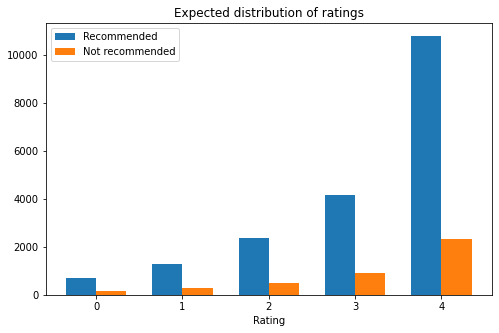

In [15]:
plt.figure(figsize=(8, 5))

width=0.35
plt.bar(expected_df.index-width/2, expected_df['1'], width, label="Recommended")
plt.bar(expected_df.index+width/2, expected_df['0'], width, label="Not recommended")

plt.title('Expected distribution of ratings')
plt.xlabel('Rating')
plt.legend();

In [16]:
ratings_recommended = e_comm_data[e_comm_data['Recommended IND'] == 1]

ratings_not_recommended = e_comm_data[e_comm_data['Recommended IND'] == 0]

In [17]:
ratings_recommended.shape, ratings_not_recommended.shape

((19300, 2), (4172, 2))

In [18]:
ratings_recommended.sample(10)

,Recommended IND,Rating
10735,1,5
17979,1,5
16632,1,5
3768,1,5
6095,1,5
18328,1,4
13613,1,3
8241,1,5
4022,1,3
4479,1,5


In [19]:
ratings_not_recommended.sample(10)

,Recommended IND,Rating
3778,0,2
312,0,3
344,0,3
972,0,1
1755,0,4
19751,0,3
9041,0,1
19531,0,1
9755,0,3
18587,0,3


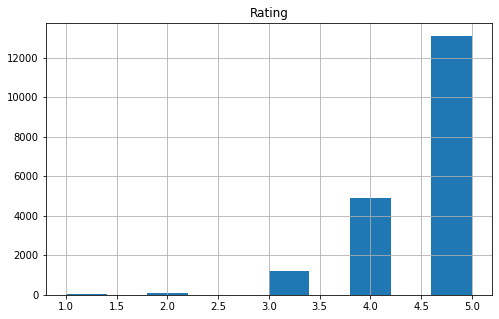

In [20]:
ratings_recommended[['Rating']].hist(figsize=(8, 5));

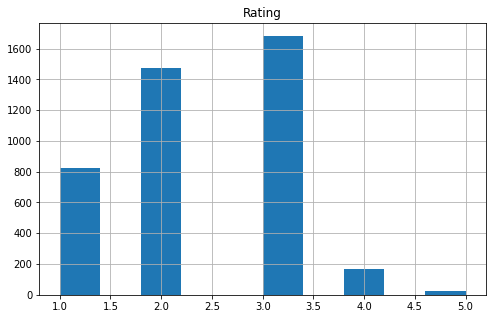

In [21]:
ratings_not_recommended[['Rating']].hist(figsize=(8, 5));

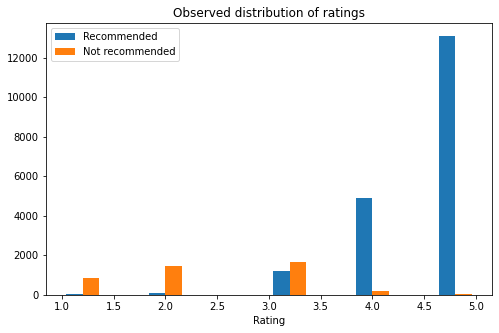

In [22]:
plt.figure(figsize=(8, 5))

plt.hist([ratings_recommended['Rating'], 
          ratings_not_recommended['Rating']])

plt.title('Observed distribution of ratings')
plt.xlabel('Rating')
plt.legend(['Recommended', 'Not recommended']);